In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pearsonr

In [ ]:
crc = pd.read_csv('../data/crc_wsi_final_results.csv', index_col = 0)
ton = pd.read_csv('../data/tonsil_final_results.csv', index_col = 0)

In [4]:
crc.groupby('proportion')['f1_score'].describe()

,count,mean,std,min,25%,50%,75%,max
proportion,,,,,,,,
0.1,1000.0,0.748963,0.032007,0.660836,0.725370,0.748840,0.772202,0.854798
0.2,1000.0,0.758199,0.030794,0.673503,0.736122,0.759723,0.779628,0.860189
0.3,1000.0,0.761777,0.031020,0.673440,0.739873,0.762718,0.783812,0.863763
0.4,1000.0,0.765603,0.030725,0.679339,0.742926,0.766969,0.787374,0.868408
0.5,1000.0,0.767006,0.030292,0.680334,0.744939,0.767659,0.788099,0.865929
0.6,1000.0,0.768254,0.030379,0.686558,0.746343,0.769347,0.789695,0.865924
0.7,1000.0,0.771389,0.030096,0.683845,0.749078,0.772846,0.792172,0.870341
0.8,1000.0,0.769780,0.030614,0.685753,0.747913,0.771067,0.791574,0.870015
0.9,1000.0,0.772229,0.029823,0.687754,0.751068,0.772958,0.793566,0.870265


In [5]:
ton.groupby('proportion')['f1_score'].describe()

,count,mean,std,min,25%,50%,75%,max
proportion,,,,,,,,
0.1,1000.0,0.762143,0.043140,0.594079,0.731662,0.765067,0.794032,0.861114
0.2,1000.0,0.765605,0.046366,0.588333,0.732369,0.770546,0.801633,0.874917
0.3,1000.0,0.778651,0.043302,0.621931,0.747828,0.783575,0.810883,0.878837
0.4,1000.0,0.783237,0.043306,0.623776,0.752338,0.789030,0.816034,0.878355
0.5,1000.0,0.791171,0.040153,0.634492,0.763845,0.795280,0.820184,0.879943
0.6,1000.0,0.782013,0.041324,0.623048,0.750801,0.787087,0.813078,0.878156
0.7,1000.0,0.792126,0.044381,0.622626,0.760756,0.798610,0.826278,0.894719
0.8,1000.0,0.791276,0.043486,0.630452,0.759961,0.798088,0.824298,0.888707
0.9,1000.0,0.797637,0.042030,0.641201,0.767767,0.803141,0.829130,0.889197


In [52]:
crc['dataset'] = 'CRC'
ton['dataset'] = 'Tonsil'

df = pd.concat([crc,ton], axis=0)

In [53]:
df = df.reset_index(drop=True)

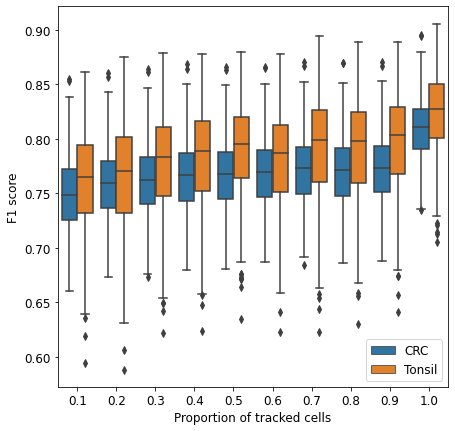

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
fig.set_facecolor('white')

sns.boxplot(
    x=[round(x,2) for x in df['proportion']],
    y=df['f1_score'],
    hue=df['dataset'],
    dodge=True,
    ax=ax
)

ax.set_ylabel('F1 score', fontsize=12)
ax.set_xlabel('Proportion of tracked cells', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

sns.move_legend(ax, loc='lower right', fontsize=12, title='')

fig.savefig('Figure_3D.png', dpi=500)

In [ ]:
datasets = []
coeffs = []
pvals = []

for d in list(df['dataset'].unique()):

    dataset_df = df[df['dataset'] == d]

    for p in list(dataset_df['panel'].unique()):
        tmp = dataset_df[dataset_df['panel'] == p]

        # remove 1.0 
        tmp = tmp[tmp['proportion'] != 1.0]

        result = pearsonr(x=tmp['proportion'], y=tmp['f1_score'])
        coeffs.append(result.statistic)
        pvals.append(result.pvalue)
        datasets.append(d)

In [ ]:
coef_df = pd.DataFrame({'dataset' : datasets, 'correlation' : coeffs})

In [42]:
len(coef_df['dataset'])

2000

In [ ]:
fig,ax = plt.subplots()
sns.histplot(coef_df[coef_df['dataset'] == 'CRC']['correlation'], ax=ax)
sns.histplot(coef_df[coef_df['dataset'] == 'Tonsil']['correlation'], ax=ax)
ax.set_xlabel('Coefficient of correlation')
ax.set_ylabel('No. of panels')
fig.set_facecolor('white')
# plt.savefig('crc_wsi_correl_coefs.png', dpi = 500)

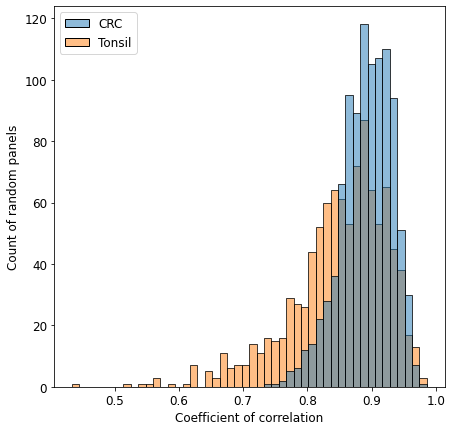

In [ ]:
fig,ax = plt.subplots(figsize = (7,7))
fig.set_facecolor('white')
sns.histplot(
    data=coef_df,
    x='correlation',
    hue='dataset',
    ax=ax)
ax.set_xlabel('Coefficient of correlation', fontsize=12)
ax.set_ylabel('Count of random panels',fontsize=12)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

sns.move_legend(ax, loc='upper left', fontsize=12, title='')
fig.savefig('Figure_3E.png', dpi=500)